# Session 1 - Introduction to Time Series
This workshop covers the fundamentals of time series management with Python. The objective is to provide the student with the fundamental knowledge to process, manage and visualize time series databases in Python. Python codes are written and executed in Jupyter Notebook. Students are provided with the respective databases. Session 1 will be an introduction to the course, where we will explore the basics of date and time handling, providing a deeper understanding of time series manipulation techniques

#### Session: 1
#### Time: 5pm- 7pm
#### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

# Table of Contents
- [1. Introduction to time series in Python](#t1)
  - [1.1. Date and time in Python](#t1.1)
  - [1.2. Adding and subtracting time series](#t1.2)
  - [1.3. Creating a sequence of dates](#t1.3)
- [2. Indexing time series data](#t2)
  - [2.1. Transforming an index into a DateTimeIndex](#t2.1)
  - [2.2. Subsetting and indexing time series ](#t2.2)
- [3. Transforming time series data](#t3)
  - [3.1 Shifting time series and calculating percentage changes](#t3.1)
  - [3.2. Changing the frequency of time series data](#t3.2)
  - [3.3. Downsampling and aggregating time series data](#t3.3)

In [1]:
import time
start = time.time()

# <a id="t1"></a>1. Introduction to time series in Python

## <a id="t1.1"></a>1.1. Date and time in Python

Pandas was originally developed to manage finantial information, which is usually presented as time series data. The name is derived from the term "panel data", an econometrics term for data sets that include observations during multiple time periods. In this course, we are going to use to better manipulate time series data.

In [2]:
import pandas as pd # We import pandas
import numpy as np # We import other necessary libraries
import matplotlib.pyplot as plt
from datetime import datetime # This will allow us to manually create dates

### ```pd.Timestamp()```
This function allows us to create points in time, providing a precise representation of a specific date and time. It is a powerful tool for working with time series data, enabling detailed and accurate time-based indexing, comparison, and arithmetic operations.

In [3]:
timestamp = pd.Timestamp(datetime(2024,7,15))
timestamp

Timestamp('2024-07-15 00:00:00')

In [4]:
timestamp = pd.Timestamp(datetime(2024,7,15, 18, 10, 5))
timestamp

Timestamp('2024-07-15 18:10:05')

We can use timestamp attributes to access various information of the data. For example, we can retrieve the year, month and even second of the timestamp. We can also use it to access the name of the week

In [5]:
timestamp.year # year

2024

In [6]:
timestamp.quarter # quarter

3

In [7]:
timestamp.month # month

7

In [8]:
timestamp.day # day

15

In [9]:
timestamp.hour # hour

18

In [10]:
timestamp.minute # minute

10

In [11]:
timestamp.second # second

5

In [12]:
timestamp.day_name()

'Monday'

In [13]:
timestamp.dayofweek

0

In [14]:
timestamp.weekofyear

29

In [15]:
timestamp.dayofyear

197

In [16]:
print(f'We are in day {timestamp.dayofyear} of 365 days')
print(f'This is the {timestamp.weekofyear}th week of the year')

We are in day 197 of 365 days
This is the 29th week of the year


### ```pd.Period()```
Allow us to create a `Period` object, which will always have a frequency. This is useful for representing a span of time with a specific start and end, such as a month, quarter, or year. 

In [17]:
period = pd.Period('2024')
period # By default, the last name of the year

Period('2024', 'Y-DEC')

In [18]:
pd.Period('2024-07')

Period('2024-07', 'M')

In [19]:
pd.Period('2024-07-15')

Period('2024-07-15', 'D')

In [20]:
pd.Period('2024-07-15-18')

Period('2024-07-15 18:00', 'h')

In [21]:
pd.Period('2024-07-15-18-15')

Period('2024-07-15 18:00', 'h')

In [22]:
period.asfreq('D')

Period('2024-12-31', 'D')

In [23]:
period.asfreq('M')

Period('2024-12', 'M')

In [24]:
period.asfreq('Q')

Period('2024Q4', 'Q-DEC')

In [25]:
period.to_timestamp() # By default, the first day of year

Timestamp('2024-01-01 00:00:00')

In [26]:
period.to_timestamp().to_period('D') 

Period('2024-01-01', 'D')

In [27]:
period = pd.Period('2024-07-15', freq='D')

In [28]:
period.day

15

In [29]:
period.days_in_month

31

In [30]:
period.start_time

Timestamp('2024-07-15 00:00:00')

In [31]:
period.end_time

Timestamp('2024-07-15 23:59:59.999999999')

In [32]:
period

Period('2024-07-15', 'D')

### ```pd.Timedelta()```
`Timedelta` objects in pandas are used to represent differences in times, such as a duration or an interval. They are useful when doing basic arithmetic with Timestamp objects, allowing you to add or subtract durations from specific dates and times. This is particularly helpful in time series analysis, scheduling tasks, and manipulating date-time data.

In [33]:
pd.Timedelta(days=5, hours=3, minutes=30)

Timedelta('5 days 03:30:00')

In [34]:
pd.Timedelta(seconds=3600)

Timedelta('0 days 01:00:00')

In [35]:
pd.Timedelta(hours=1)

Timedelta('0 days 01:00:00')

In [36]:
pd.Timedelta(weeks=2)  

Timedelta('14 days 00:00:00')

### Some attributes for `TimeStamp` and `Period` objects

| Common Attributes               | Period Attributes            | Timestamp Attributes            |
|---------------------------------|------------------------------|---------------------------------|
| `.year`                         | `.freq`                      | `.date`                         |
| `.month`                        | `.freqstr`                   | `.time`                         |
| `.day`                          | `.days_in_month`             | `.strftime()`                   |  
| `.hour`                         | `.is_leap_year`              | `.timestamp()`                  |        
| `.minute`                       | `.ordinal`                   | `.to_julian_date()`             |            
| `.second`                       | `.qyear`                     | `.to_period()`                  |    
| `.dayofweek`                    | `.start_time`                | `.weekday()`                    |
| `.dayofyear`                    | `.end_time`                  | `.astimezone()`                 |
| `.weekofyear`                   | `.strftime()`                |                                 | 
| `.quarter`                      | `.to_timestamp()`            |                                 |




## <a id="t1.2"></a>1.2. Adding and subtracting time series
We can do some basic date arithmetic with our time series objetcs

In [37]:
today = pd.Period('2024-07-15')
today

Period('2024-07-15', 'D')

In [38]:
today + 3

Period('2024-07-18', 'D')

In [39]:
today - 3

Period('2024-07-12', 'D')

In [40]:
pd.Timestamp('2024-07-15') + pd.Timedelta(days=3)

Timestamp('2024-07-18 00:00:00')

In [41]:
pd.Timestamp('2024-07-15') - pd.Timedelta(days=3)

Timestamp('2024-07-12 00:00:00')

In [42]:
period + 2

Period('2024-07-17', 'D')

In [43]:
period - 2

Period('2024-07-13', 'D')

In [44]:
july = pd.Period('2024-07')

In [45]:
july+5

Period('2024-12', 'M')

In [46]:
july-5

Period('2024-02', 'M')

## <a id='1.3.'> 1.3. Creating a sequence of dates </a> 

### ```pd.date_range()```
This pandas function allows us to create a `DatetimeIndex`, which can be used to generate a range of dates with a specified frequency. This DatetimeIndex can serve multiple purposes, such as being used as an index for a DataFrame or Series, facilitating time series analysis, and aligning data to specific date ranges. 

In [47]:
pd.date_range(start='2003', periods=21, freq='Y')

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\1747562845.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start='2003', periods=21, freq='Y')


DatetimeIndex(['2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [48]:
pd.date_range(start='2013', periods=21, freq='M')

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\3828105659.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2013', periods=21, freq='M')


DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30'],
              dtype='datetime64[ns]', freq='ME')

In [49]:
index = pd.date_range(start='2024-01-01', periods=12, freq='M')
index[0]

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\1001732193.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2024-01-01', periods=12, freq='M')


Timestamp('2024-01-31 00:00:00')

In [50]:
index.to_period()

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [51]:
index.to_period().to_timestamp()

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [52]:
# Creating a dataframe
datetime_index = pd.date_range(start='2024-01', periods=12, freq='M')
df_datetime = pd.DataFrame({'data': np.random.random(size=12)}, index=datetime_index)
df_datetime

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\2782821598.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datetime_index = pd.date_range(start='2024-01', periods=12, freq='M')


,data
2024-01-31,0.819959
2024-02-29,0.017582
2024-03-31,0.627352
2024-04-30,0.635726
2024-05-31,0.049584
2024-06-30,0.161689
2024-07-31,0.340420
2024-08-31,0.725391
2024-09-30,0.757543
2024-10-31,0.616872


In [53]:
# We create the range of dates here from January 1st 2024 to January 7th 2024
days = pd.date_range(start='2024-7-15', periods =7, freq='D')

# We iterate over the dates and print the name of the weekday
for day in days:
    print(day.dayofweek, day.day_name())

0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday


### `pd.period_range()`
This pandas function allows us to create a `PeriodIndex`, which can be used to generate a range of time periods with a specified frequency. 

In [54]:
pd.period_range(start='2003', periods=21, freq='Y')

PeriodIndex(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
             '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
             '2019', '2020', '2021', '2022', '2023'],
            dtype='period[Y-DEC]')

In [55]:
pd.period_range(start='2024-01-01', periods=12, freq='M')

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [56]:
index = pd.period_range(start='2024-01-01', periods=12, freq='M')
index[0]

Period('2024-01', 'M')

In [57]:
index.to_timestamp()

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [58]:
index.to_timestamp().to_period()

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [59]:
# Creating a dataframe
period_index = pd.period_range(start='2024-01', periods=12, freq='M')
df_period = pd.DataFrame({'data': range(12)+np.random.random(size=12)}, index=period_index)
df_period

,data
2024-01,0.809643
2024-02,1.960997
2024-03,2.566322
2024-04,3.102205
2024-05,4.751911
2024-06,5.187178
2024-07,6.171749
2024-08,7.302230
2024-09,8.293450
2024-10,9.737234


### Differences between `PeriodIndex` and `DatetimeIndex`

| Feature             | `DatetimeIndex`                                         | `PeriodIndex`                                           |
|---------------------|---------------------------------------------------------|---------------------------------------------------------|
| **Definition**      | Sequence used to index time series by specific points in time | Sequence used to index time series by spans of time (periods) |
| **Granularity**     | Represents precise moments in time                      | Represents periods of time with a defined frequency      |
| **Flexibility**     | Allows operations involving specific timestamps         | Allows operations involving whole periods               |
| **Use**        | Ideal for data where exact timestamps are important (e.g., financial data, time series data) | Ideal for data aggregated over consistent intervals (e.g., monthly sales, quarterly reports) |
| **Creation Example**| `pd.date_range(start='2024-01-01', periods=31, freq='D')` | `pd.period_range(start='2024-01', periods=12, freq='M')`  |
| **Attributes**      | Access to year, month, day, hour, minute, second        | Access to start time, end time, and frequency            |
| **Timezone**        | Can be localized and converted to different timezones   | Does not involve timezones                               |
| **Use of Frequency**| Optional; can represent irregular time points           | Always associated with a specific frequency              |
| **Arithmetic Ops**  | Operations involve exact timestamps and `Timedelta` objects | Operations involve whole periods and period arithmetic   |
| **Typical Use Cases**| High-frequency data or data requiring precise timestamps | Regular interval data where periods matter more than exact timestamps |

During the development of this course we are going to mainly use `DatetimeIndex`

# <a id="t2"></a>2. Indexing time series data

## <a id="t2.1"></a>2.1. Transforming an index into a DateTimeIndex

### `pd.to_datetime()`

In [60]:
NVDA = pd.read_csv('../data/nvda.csv', delimiter=';')
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [61]:
NVDA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23/06/2023,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
1,26/06/2023,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2,27/06/2023,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
3,28/06/2023,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
4,29/06/2023,41.557999,41.599998,40.599998,40.821999,40.809776,380514000


In [62]:
NVDA.Date

0      23/06/2023
1      26/06/2023
2      27/06/2023
3      28/06/2023
4      29/06/2023
          ...    
246    14/06/2024
247    17/06/2024
248    18/06/2024
249    20/06/2024
250    21/06/2024
Name: Date, Length: 251, dtype: object

In [63]:
pd.to_datetime(NVDA.Date, format='%d/%m/%Y')

0     2023-06-23
1     2023-06-26
2     2023-06-27
3     2023-06-28
4     2023-06-29
         ...    
246   2024-06-14
247   2024-06-17
248   2024-06-18
249   2024-06-20
250   2024-06-21
Name: Date, Length: 251, dtype: datetime64[ns]

In [64]:
NVDA.Date = pd.to_datetime(NVDA.Date, format='%d/%m/%Y')

In [65]:
NVDA.set_index('Date', inplace=True)
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000


### `pd.read_csv()`

In [66]:
NVDA = pd.read_csv('../data/NVDA.csv', delimiter=';', parse_dates=["Date"], dayfirst=True, index_col="Date")
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000


## <a id="t2.2"></a>2.2. Subsetting a time series


Only possible if the index of the DataFrame contains the index of type DateTimeIndex

### `.loc`

In [67]:
NVDA.loc['2024'] # Select an entire year

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,49.243999,49.294998,47.595001,48.167999,48.161785,411254000
2024-01-03,47.485001,48.183998,47.320000,47.569000,47.562862,320896000
2024-01-04,47.766998,48.500000,47.507999,47.998001,47.991810,306535000
2024-01-05,48.462002,49.547001,48.306000,49.097000,49.090664,415039000
2024-01-08,49.512001,52.275002,49.479000,52.252998,52.246254,642510000
...,...,...,...,...,...,...
2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400
2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100


In [68]:
NVDA.loc['2023-06'] # Select an entire month

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000
2023-06-30,41.680000,42.549999,41.500999,42.301998,42.289337,501148000


In [69]:
NVDA.loc['2024-06', 'Open'] # Select an specific column

Date
2024-06-03    113.621002
2024-06-04    115.716003
2024-06-05    118.371002
2024-06-06    124.047997
2024-06-07    119.769997
2024-06-10    120.370003
2024-06-11    121.769997
2024-06-12    123.059998
2024-06-13    129.389999
2024-06-14    129.960007
2024-06-17    132.990005
2024-06-18    131.139999
2024-06-20    139.800003
2024-06-21    127.120003
Name: Open, dtype: float64

# <a id="t3"></a>3. Manipulating time series data

## <a id="t3.1"></a>3.1 Shifting time series and calculating percentage changes

### `.shift()`
This function is used to shift the values in a Series or DataFrame by a specified number of periods along a given axis, while preserving the alignment of the data. It can be used to create lagged or lead variables.

In [70]:
nvidia = NVDA[["Close"]].copy()

In [71]:
nvidia.head()

,Close
Date,
2023-06-23,42.209000
2023-06-26,40.632000
2023-06-27,41.875999
2023-06-28,41.117001
2023-06-29,40.821999


In [72]:
nvidia['lagged'] = nvidia["Close"].shift(periods=-30) # We shift 30 days backward

In [73]:
nvidia['shifted'] = nvidia["Close"].shift(periods=30) # We shift 30 days forward

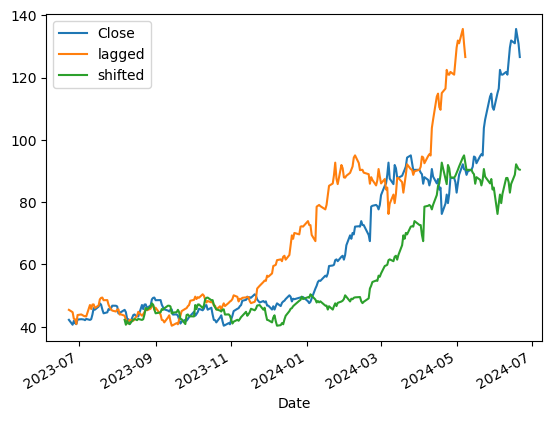

In [74]:
nvidia.plot()
plt.show()

In [75]:
nvidia = NVDA[["Close"]].copy()
nvidia['lagged'] = nvidia["Close"].shift(periods=-1) # We shift 1 days backward
nvidia['shifted'] = nvidia["Close"].shift(periods=1) # We shift 1 days forward
nvidia.head()

,Close,lagged,shifted
Date,,,
2023-06-23,42.209000,40.632000,NaN
2023-06-26,40.632000,41.875999,42.209000
2023-06-27,41.875999,41.117001,40.632000
2023-06-28,41.117001,40.821999,41.875999
2023-06-29,40.821999,42.301998,41.117001


In [76]:
nvidia.tail()

,Close,lagged,shifted
Date,,,
2024-06-14,131.880005,130.979996,129.610001
2024-06-17,130.979996,135.580002,131.880005
2024-06-18,135.580002,130.779999,130.979996
2024-06-20,130.779999,126.570000,135.580002
2024-06-21,126.570000,NaN,130.779999


### `.div()`, `.sub()` and `.mul()`
`.div()` is quite useful if we want to perform operations between columns. For example we can obtain the daily percent change just by dividing \
$$Y_t/Y_{t-1}$$

In [77]:
nvidia['change'] = nvidia.Close.div(nvidia.shifted) # We divide the price value by its past value
nvidia[["Close", "shifted", "change"]].head()

,Close,shifted,change
Date,,,
2023-06-23,42.209000,NaN,NaN
2023-06-26,40.632000,42.209000,0.962638
2023-06-27,41.875999,40.632000,1.030616
2023-06-28,41.117001,41.875999,0.981875
2023-06-29,40.821999,41.117001,0.992825


Then, if we want to calculate the return, we just need to substract 1 with `.sub()` and multiply the result by 100 with `.mul()` 

In [78]:
nvidia['return'] = nvidia.change.sub(1).mul(100)
nvidia[["Close", "shifted", "change", "return"]].head()

,Close,shifted,change,return
Date,,,,
2023-06-23,42.209000,NaN,NaN,NaN
2023-06-26,40.632000,42.209000,0.962638,-3.736170
2023-06-27,41.875999,40.632000,1.030616,3.061624
2023-06-28,41.117001,41.875999,0.981875,-1.812489
2023-06-29,40.821999,41.117001,0.992825,-0.717470


### `.diff()`
It allow us to quickly perform the following calculation to get the difference value of two adjacent values:
$$\Delta Y_t = Y_t - Y_{t-1} $$

In [79]:
nvidia['diff'] = nvidia.Close.diff()
nvidia[["Close", "change", "return", "diff"]].head()

,Close,change,return,diff
Date,,,,
2023-06-23,42.209000,NaN,NaN,NaN
2023-06-26,40.632000,0.962638,-3.736170,-1.577000
2023-06-27,41.875999,1.030616,3.061624,1.243999
2023-06-28,41.117001,0.981875,-1.812489,-0.758998
2023-06-29,40.821999,0.992825,-0.717470,-0.295002


### `.pct_change()`
It allows us to get the percentual change in the value of the variable

In [80]:
nvidia['pct_change'] = nvidia.Close.pct_change().mul(100)
nvidia[["Close", "shifted", "change", "return", "pct_change"]].head()

,Close,shifted,change,return,pct_change
Date,,,,,
2023-06-23,42.209000,NaN,NaN,NaN,NaN
2023-06-26,40.632000,42.209000,0.962638,-3.736170,-3.736170
2023-06-27,41.875999,40.632000,1.030616,3.061624,3.061624
2023-06-28,41.117001,41.875999,0.981875,-1.812489,-1.812489
2023-06-29,40.821999,41.117001,0.992825,-0.717470,-0.717470


In [81]:
# We can also get the return on multiple periods
nvidia['return_7d'] = nvidia.Close.pct_change(periods=7).mul(100)
nvidia[["Close", "return_7d"]].tail()

,Close,return_7d
Date,,
2024-06-14,131.880005,7.709901
2024-06-17,130.979996,8.249719
2024-06-18,135.580002,12.153400
2024-06-20,130.779999,7.381557
2024-06-21,126.570000,4.681164


In [82]:
nvidia['daily_return'] = nvidia['Close'].pct_change(periods = 1).mul(100) # Create a daily return
nvidia['monthly_return'] = nvidia['Close'].pct_change(periods = 30).mul(100) # Create a monthly return
nvidia['quarterly_return'] = nvidia['Close'].pct_change(periods = 120).mul(100) # Create a quarterly return

In [83]:
nvidia[["daily_return", "monthly_return", "quarterly_return"]].tail()

,daily_return,monthly_return,quarterly_return
Date,,,
2024-06-14,1.751411,53.675849,169.197795
2024-06-17,-0.682445,47.518267,168.236721
2024-06-18,3.511991,47.145652,175.127346
2024-06-20,-3.540347,44.422110,164.645768
2024-06-21,-3.219146,39.992474,155.583382


## <a id="t3.2"></a>3.2. Changing the frequency of time series data

### `.asfreq()`
It converts the time series to specified frequency. It returns the original data conformed to a new index with the specified frequency.

In [84]:
NVDA.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Here we see an example of upsampling. We increase the frequency changing it to calendar day. A higher frequency with the same data creates missing values.

In [85]:
NVDA_daily = NVDA.asfreq('D') # Change to calendar day frequency
NVDA_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000.0
2023-06-24,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-25,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000.0
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000.0


In [86]:
NVDA_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-06-23 to 2024-06-21
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [87]:
NVDA_daily.isna().sum()

Open         114
High         114
Low          114
Close        114
Adj Close    114
Volume       114
dtype: int64

Now we do the opposite, downsampling our data from calendar to business frequency

<Axes: xlabel='Date'>

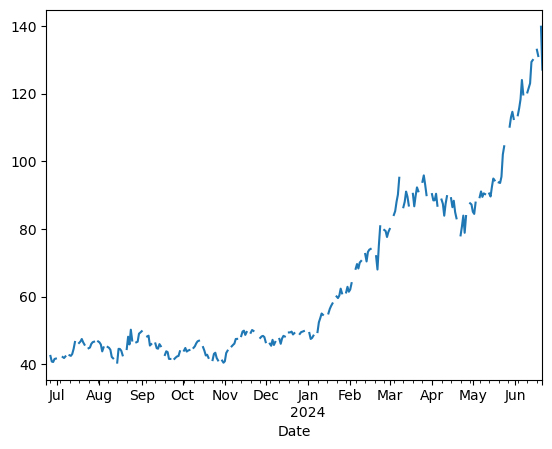

In [88]:
NVDA_daily.Open.plot() # We observe multiple missing data points

In [89]:
NVDA_business = NVDA_daily.asfreq('B') # Back to business frequency
NVDA_business.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000.0
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000.0
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000.0
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000.0
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000.0


In [90]:
NVDA_business.isna().sum()

Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

<Axes: xlabel='Date'>

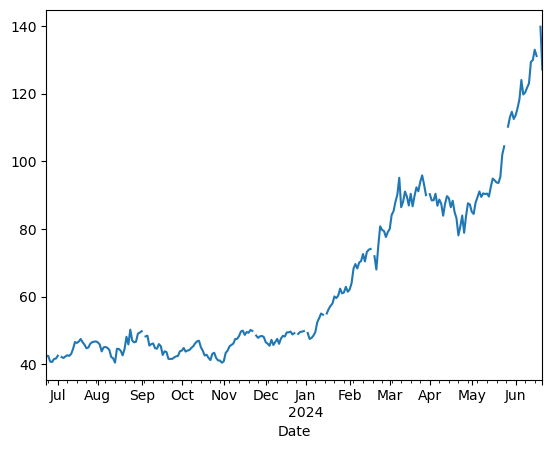

In [91]:
NVDA_business.Open.plot() # Converting twice the dataframe we have created missing points

<Axes: xlabel='Date'>

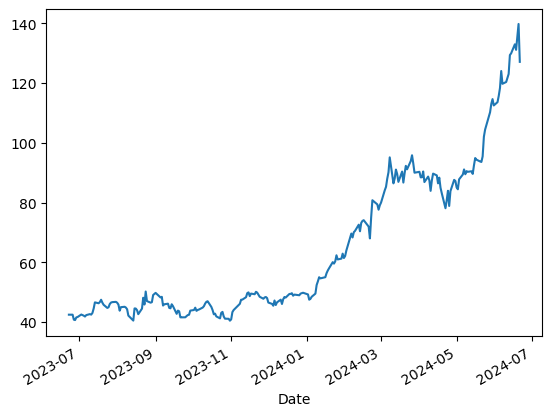

In [92]:
NVDA.Open.plot() # Compare it with the original dataframe

In [93]:
date = pd.date_range(start="2021", periods=4, freq="Q")
data = range(1, 5)

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\1323707329.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  date = pd.date_range(start="2021", periods=4, freq="Q")


In [94]:
quaterly_data = pd.Series(data=data, index=date)
quaterly_data

2021-03-31    1
2021-06-30    2
2021-09-30    3
2021-12-31    4
Freq: QE-DEC, dtype: int64

In [95]:
# Upsampling, from quarter to month
monthly_data = quaterly_data.asfreq("M")
monthly_data

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\2390095823.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = quaterly_data.asfreq("M")


2021-03-31    1.0
2021-04-30    NaN
2021-05-31    NaN
2021-06-30    2.0
2021-07-31    NaN
2021-08-31    NaN
2021-09-30    3.0
2021-10-31    NaN
2021-11-30    NaN
2021-12-31    4.0
Freq: ME, dtype: float64

In [96]:
monthly_data = monthly_data.to_frame("base")

In [97]:
monthly_data["ffill"] = quaterly_data.asfreq("M", method = "ffill")
monthly_data["bfill"] = quaterly_data.asfreq("M", method = "bfill")
monthly_data["fill_value"] = quaterly_data.asfreq("M", fill_value = 0)
monthly_data

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\2873989231.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data["ffill"] = quaterly_data.asfreq("M", method = "ffill")
C:\Users\estca\AppData\Local\Temp\ipykernel_3036\2873989231.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data["bfill"] = quaterly_data.asfreq("M", method = "bfill")
C:\Users\estca\AppData\Local\Temp\ipykernel_3036\2873989231.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data["fill_value"] = quaterly_data.asfreq("M", fill_value = 0)


,base,ffill,bfill,fill_value
2021-03-31,1.0,1,1,1
2021-04-30,NaN,1,2,0
2021-05-31,NaN,1,2,0
2021-06-30,2.0,2,2,2
2021-07-31,NaN,2,3,0
2021-08-31,NaN,2,3,0
2021-09-30,3.0,3,3,3
2021-10-31,NaN,3,4,0
2021-11-30,NaN,3,4,0
2021-12-31,4.0,4,4,4


### `.reindex()`
The `.reindex()` function in pandas is used to conform a DataFrame or Series to a new index, optionally filling in missing values if any indices are not present in the original data

In [98]:
dates = pd.date_range(start="2021", periods=12, freq="M")
quaterly_data.reindex(dates)

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\3436361202.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2021", periods=12, freq="M")


2021-01-31    NaN
2021-02-28    NaN
2021-03-31    1.0
2021-04-30    NaN
2021-05-31    NaN
2021-06-30    2.0
2021-07-31    NaN
2021-08-31    NaN
2021-09-30    3.0
2021-10-31    NaN
2021-11-30    NaN
2021-12-31    4.0
Freq: ME, dtype: float64

In [99]:
dates = pd.date_range(start="2021", periods=4, freq="Q")
monthly_data.reindex(dates)

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\1186398778.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(start="2021", periods=4, freq="Q")


,base,ffill,bfill,fill_value
2021-03-31,1.0,1,1,1
2021-06-30,2.0,2,2,2
2021-09-30,3.0,3,3,3
2021-12-31,4.0,4,4,4


## <a id="t3.3"></a>3.3. Downsampling and aggregating time series data

### `.resample()`
This function works similarly to `.groupby()`. It is used for frequency conversion and resampling of time series, grouping data within resampling period. It is important that the object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex)

<table>
  <tr>
    <td>
      <table>
        <tr>
          <th>Frequency</th>
          <th>Alias</th>
          <th>Sample Date</th>
        </tr>
        <tr>
          <td>Calendar Month End</td>
          <td>M</td>
          <td>2024-06-30</td>
        </tr>
        <tr>
          <td>Calendar Month Start</td>
          <td>MS</td>
          <td>2024-06-01</td>
        </tr>
        <tr>
          <td>Business Month End</td>
          <td>BM</td>
          <td>2024-06-28</td>
        </tr>
        <tr>
          <td>Business Month Start</td>
          <td>BMS</td>
          <td>2024-06-03</td>
        </tr>
      </table>
    </td>
    <td>
      <table>
        <tr>
          <th>Frequency</th>
          <th>Alias</th>
          <th>Sample Date</th>
        </tr>
        <tr>
          <td>Calendar Quarter End</td>
          <td>Q</td>
          <td>2024-06-30</td>
        </tr>
        <tr>
          <td>Calendar Quarter Start</td>
          <td>QS</td>
          <td>2024-04-01</td>
        </tr>
        <tr>
          <td>Business Quarter End</td>
          <td>BQ</td>
          <td>2024-06-28</td>
        </tr>
        <tr>
          <td>Business Quarter Start</td>
          <td>BQS</td>
          <td>2024-04-01</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

In [100]:
NVDA.asfreq("BM").head()

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\3236521991.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  NVDA.asfreq("BM").head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-30,41.680000,42.549999,41.500999,42.301998,42.289337,501148000.0
2023-07-31,46.754002,47.130001,46.506001,46.729000,46.715012,251055000.0
2023-08-31,49.380001,49.743999,48.958000,49.355000,49.340229,528570000.0
2023-09-29,43.827000,44.144001,43.306999,43.499001,43.489563,397830000.0
2023-10-31,40.450001,40.879002,39.230000,40.779999,40.771152,517969000.0


In [101]:
NVDA.resample("BM").asfreq().head()

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\248217492.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  NVDA.resample("BM").asfreq().head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-30,41.680000,42.549999,41.500999,42.301998,42.289337,501148000.0
2023-07-31,46.754002,47.130001,46.506001,46.729000,46.715012,251055000.0
2023-08-31,49.380001,49.743999,48.958000,49.355000,49.340229,528570000.0
2023-09-29,43.827000,44.144001,43.306999,43.499001,43.489563,397830000.0
2023-10-31,40.450001,40.879002,39.230000,40.779999,40.771152,517969000.0


In [102]:
nvidia = NVDA[["Close"]].copy()

In [103]:
nvidia.resample("MS").bfill().add_suffix("_bfill")

,Close_bfill
Date,
2023-06-01,42.209000
2023-07-01,42.412998
2023-08-01,46.507000
2023-09-01,48.508999
2023-10-01,44.782001
2023-11-01,42.325001
2023-12-01,46.764999
2024-01-01,48.167999
2024-02-01,63.027000


In [104]:
nvidia.resample("MS").ffill().add_suffix("_ffill")

,Close_ffill
Date,
2023-06-01,NaN
2023-07-01,42.301998
2023-08-01,46.507000
2023-09-01,48.508999
2023-10-01,43.499001
2023-11-01,42.325001
2023-12-01,46.764999
2024-01-01,49.521999
2024-02-01,63.027000


In [105]:
nvidia.resample("MS").interpolate().add_suffix("_interpolate")

,Close_interpolate
Date,
2023-06-01,NaN
2023-07-01,NaN
2023-08-01,46.507000
2023-09-01,48.508999
2023-10-01,45.417000
2023-11-01,42.325001
2023-12-01,46.764999
2024-01-01,54.896000
2024-02-01,63.027000


<Axes: xlabel='Date'>

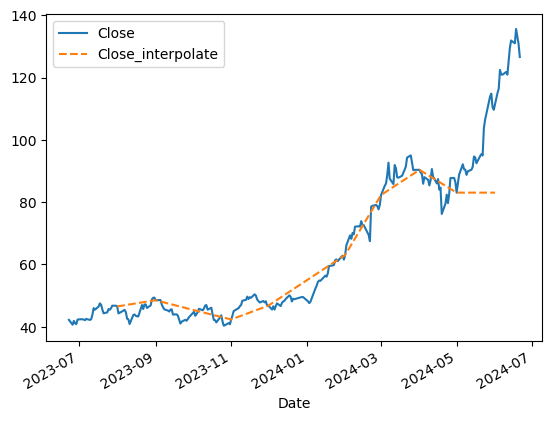

In [106]:
ax = nvidia.plot()
nvidia.resample("MS").interpolate().add_suffix("_interpolate").plot(ax=ax, style='--')

<Axes: xlabel='Date'>

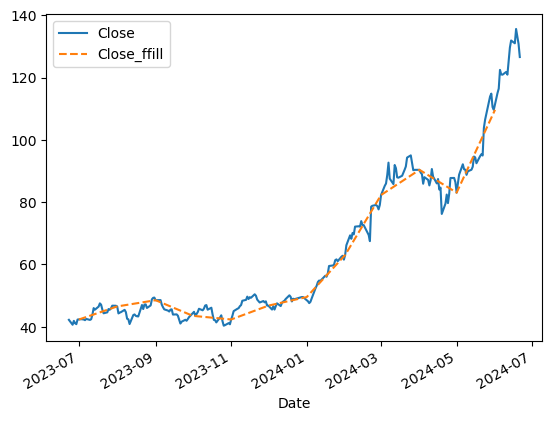

In [107]:
ax = nvidia.plot()
nvidia.resample("MS").ffill().add_suffix("_ffill").plot(ax=ax, style='--')

### Aggregation with `.resample()`

In [108]:
ozone_ny = pd.read_csv('../data/ozone_nyc.csv', delimiter = ",", parse_dates=["date"], index_col="date")
ozone_ny.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [109]:
monthly_mean = ozone_ny.resample("M").mean()
monthly_mean.head()

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\2436380352.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = ozone_ny.resample("M").mean()


,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [110]:
monthly_median = ozone_ny.resample("M").median()
monthly_median.head()

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\3386820584.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_median = ozone_ny.resample("M").median()


,Ozone
date,
2000-01-31,0.009486
2000-02-29,0.010726
2000-03-31,0.017004
2000-04-30,0.019866
2000-05-31,0.026018


<Axes: xlabel='date'>

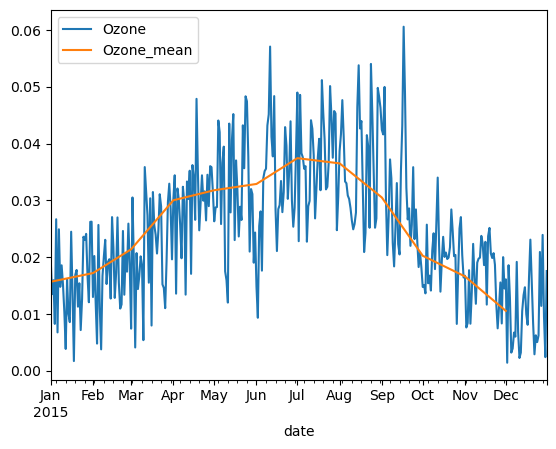

In [111]:
ax = ozone_ny.loc["2015"].plot()
monthly_mean.loc["2015"].add_suffix("_mean").plot(ax=ax)

<Axes: xlabel='date'>

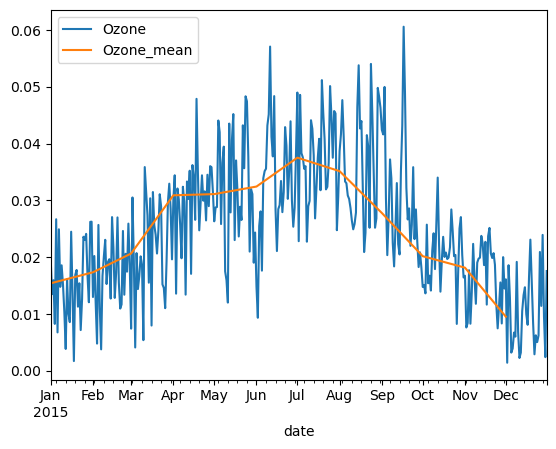

In [112]:
ax = ozone_ny.loc["2015"].plot()
monthly_median.loc["2015"].add_suffix("_mean").plot(ax=ax)

In [113]:
ozone = pd.read_csv('../data/ozone_nyla.csv', delimiter = ",", parse_dates=["date"], index_col="date")
ozone.head()

,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754


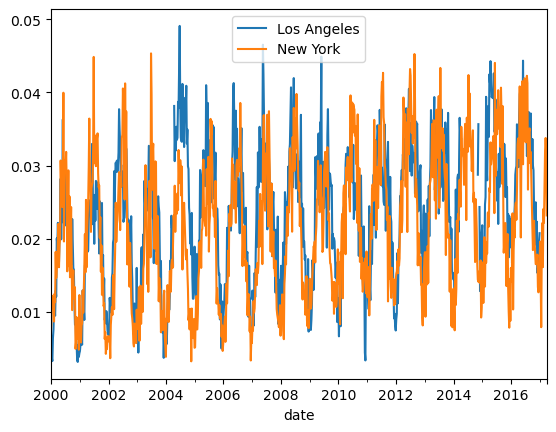

In [114]:
ozone.resample('W').mean().plot() # Weekly average trend
plt.show()

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\2207173292.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ozone.resample('M').mean().plot() # Monthly average trend


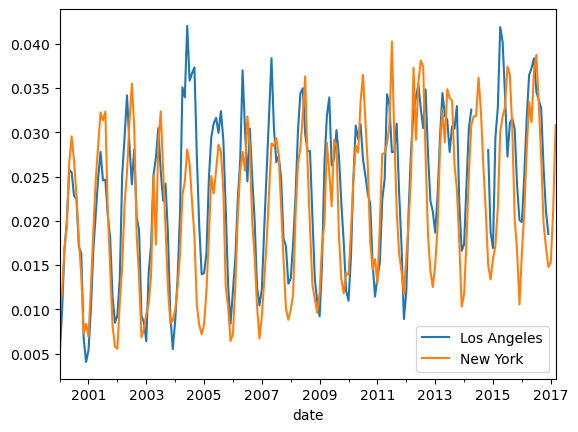

In [115]:
ozone.resample('M').mean().plot() # Monthly average trend
plt.show()

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\2862486953.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ozone.resample('A').mean().plot() # Yearly average trend


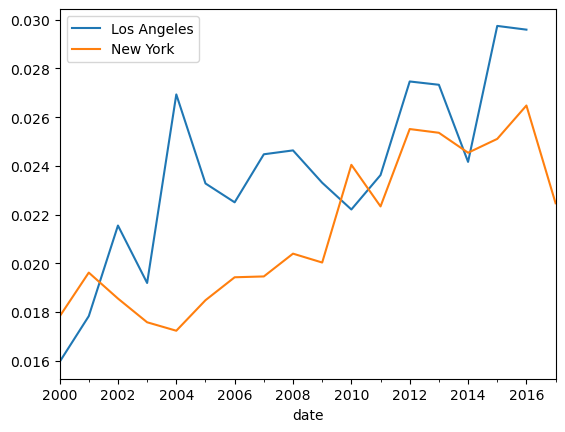

In [116]:
ozone.resample('A').mean().plot() # Yearly average trend
plt.show()

### `.agg()`
It is a method used to apply one or more aggregation functions to a DataFrame or Series. It stands for "aggregate" and allows you to perform a variety of summary operations

In [117]:
daily_returns = nvidia.squeeze().pct_change() # We calculate the daily returns

stats = daily_returns.resample('M').agg(['mean', 'median', 'std']) # And show some statistics

C:\Users\estca\AppData\Local\Temp\ipykernel_3036\1602794183.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stats = daily_returns.resample('M').agg(['mean', 'median', 'std']) # And show some statistics


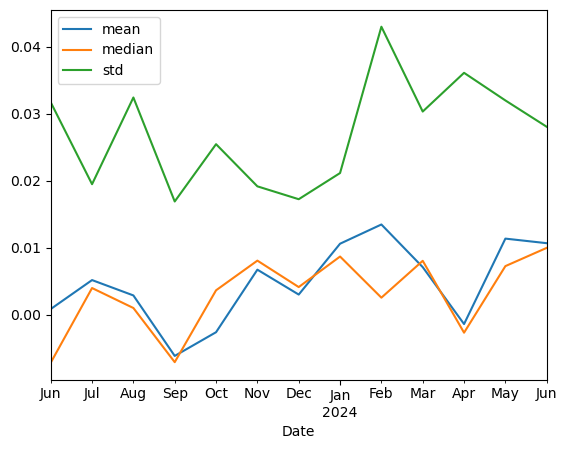

In [118]:
stats.plot()
plt.show()

In [119]:
end = time.time()
timelapse = end - start
timelapse

10.376426696777344